# Case Study 1: Clustering
## ECE 204 Data Science & Engineering

### Lecture Notes

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

### In-Class Activity
#### Please first read the questions in the in-class activity, where the questions are there in detail. This is just a starter notebook.

---
**Problem 1.** How many clusters are there in the dataset created by make_blobs?

In [18]:
from sklearn.datasets import make_blobs
### Add additional import statements here ###

X, _ = make_blobs(
    n_samples=1500,
    random_state=170,
)
df = pd.DataFrame(X, columns=["x", "y"])
df.head(n=2)

,x,y
0,-5.198113,0.641869
1,-5.752295,0.418627


<Axes: xlabel='x', ylabel='y'>

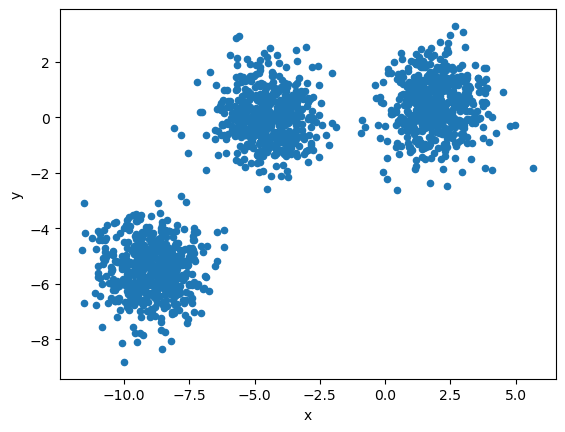

In [19]:
## Your code here -- plot the data. How many clusters are there?
df.plot.scatter(x="x", y="y")

**Problem 2.** How does KMeans cluster dataset above when n_clusters is mis-specified?

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


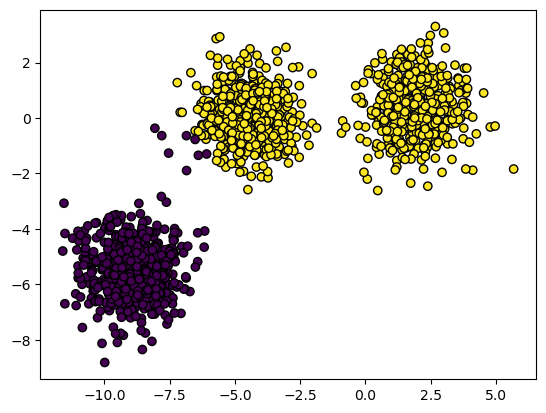

In [20]:
## Your code here -- specify 2 clusters in KMeans, and visualize the results
# What two clusters are mis-clustered as the same cluster?
km = KMeans(n_clusters=2)
plt.scatter(df["x"], df["y"], c=km.fit_predict(df), cmap="viridis", edgecolors="k")


This makes sense because the clusters that have the same mean for one variable are closer together. `KMeans` clusters these two together because they are closer than the third cluster.

**Problem 3.** Run KMeans on the provided data set below, making sure to specify the number of clusters in a way that matches the data set well.

`KMeans` certainly depends on the *data position.*

How does `KMeans` depend on the *data shape*?

In [23]:
X, y = make_blobs(n_samples=1500, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
df = pd.DataFrame(X, columns=["x", "y"])
df.head()

,x,y
0,-3.424694,3.856715
1,-3.670550,4.019227
2,-3.508982,0.465036
3,-2.453220,2.227331
4,-2.156954,2.274100


<Axes: xlabel='x', ylabel='y'>

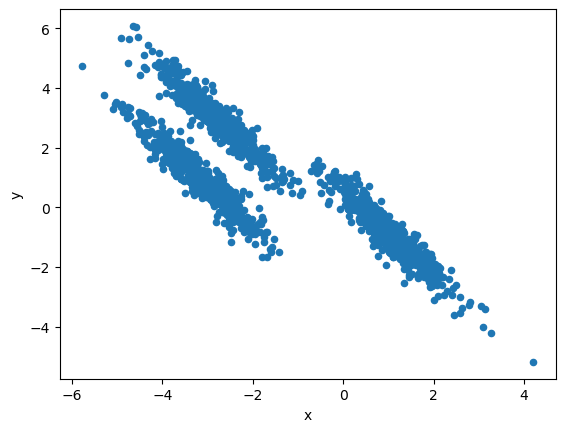

In [24]:
# Your code here -- plot the data. What does the data look like?
df.plot.scatter(x="x", y="y")

Notice that the clusters in this case are not radially symmetric.. Let's try KMeans again with `n_clusters` specified to match the number of clusters in your plot and see what happens.

In [25]:
## Your code here -- specify your clusters in the `y_pred` variable below. What does the clustering do?

# define y_pred, which should be the cluster labels
y_pred = km.fit_predict(df)

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

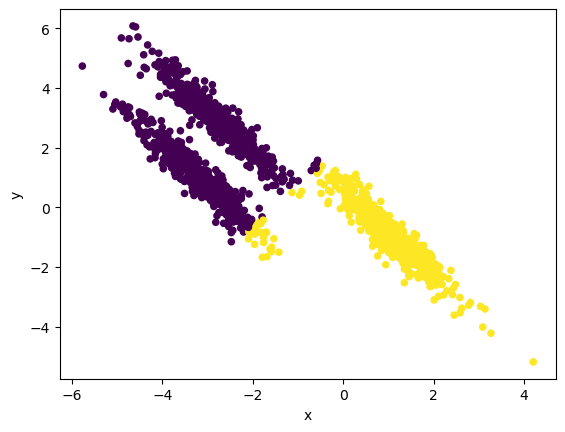

In [26]:
df = pd.DataFrame(X, columns=["x", "y"])
df["predicted"] = y_pred
df.plot.scatter(x="x", y="y", c="predicted",
                cmap="viridis", colorbar=False)

What is `KMeans` trying to do?

**Problem 4.** Plot the data set provided below to determine the number of clusters to use with KMeans. Next, cluster the data set with the initialization provided. How well did KMeans cluster the data set?

In [27]:
X, y = make_blobs(n_samples=1500, random_state=173)
df = pd.DataFrame(X, columns=["x", "y"])
df.head(n=2)

,x,y
0,-10.140470,3.232761
1,2.638694,6.283709


<Axes: xlabel='x', ylabel='y'>

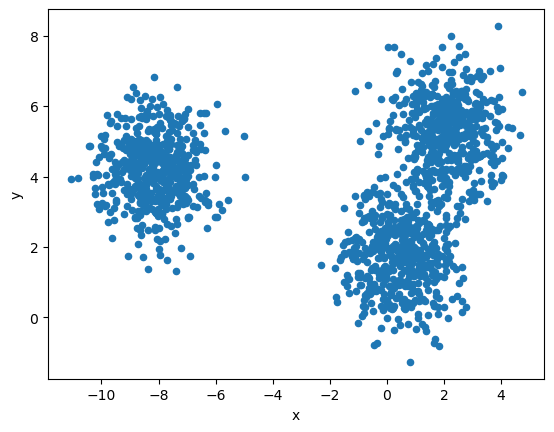

In [28]:
# Your code here -- plot the data. What does the data look like?
df.plot.scatter(x="x", y="y")

In [30]:
# define the number of clusters to use for KMeans. Be sure to choose a number that
# matches the data set well
n_clusters = 3

km = KMeans(n_clusters=n_clusters, n_init=1, init=np.array([[0, 0], [0, 0], [-1, 0]]))

y_pred = km.fit_predict(df)

<Axes: xlabel='x', ylabel='y'>

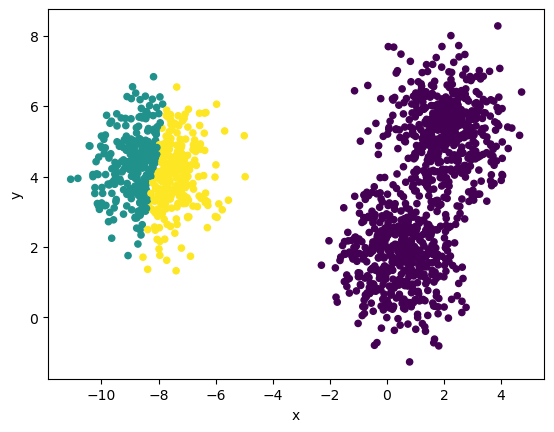

In [31]:
df = pd.DataFrame(X, columns=["x", "y"])
df.plot.scatter(x="x", y="y", c=y_pred,
                cmap="viridis", colorbar=False)